In [1]:
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from distfit import distfit
from sklearn.linear_model import LinearRegression

In [2]:
df1=pd.read_csv('2014.csv')
df2=pd.read_csv('2015.csv')
df3=pd.read_csv('2016.csv')
df4=pd.read_csv('2017.csv')
df5=pd.read_csv('2018.csv')

In [3]:
df=pd.concat([df1,df2,df3,df4,df5],axis=0)
df.reset_index(drop=True,inplace=True)

In [4]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2014-01-01,AA,2377,ICT,DFW,1135,1144.0,9.0,12.0,1156.0,...,85.0,78.0,57.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,AA,2378,MIA,TPA,2225,2220.0,-5.0,14.0,2234.0,...,60.0,55.0,37.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,EV,2500,DFW,HOU,2105,NaN,NaN,NaN,NaN,...,60.0,NaN,NaN,247.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,EV,2502,CRW,DFW,1655,1805.0,70.0,6.0,1811.0,...,185.0,180.0,150.0,946.0,0.0,0.0,0.0,0.0,65.0,NaN
4,2014-01-01,EV,2502,DFW,CRW,1320,1440.0,80.0,9.0,1449.0,...,125.0,115.0,101.0,946.0,6.0,0.0,0.0,0.0,64.0,NaN


In [5]:
df.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
30144610,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN
30144611,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN
30144612,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN
30144613,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
30144614,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,...,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2014-01-01,AA,2377,ICT,DFW,1135,1144.0,9.0,12.0,1156.0,...,85.0,78.0,57.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,AA,2378,MIA,TPA,2225,2220.0,-5.0,14.0,2234.0,...,60.0,55.0,37.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,EV,2500,DFW,HOU,2105,NaN,NaN,NaN,NaN,...,60.0,NaN,NaN,247.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,EV,2502,CRW,DFW,1655,1805.0,70.0,6.0,1811.0,...,185.0,180.0,150.0,946.0,0.0,0.0,0.0,0.0,65.0,NaN
4,2014-01-01,EV,2502,DFW,CRW,1320,1440.0,80.0,9.0,1449.0,...,125.0,115.0,101.0,946.0,6.0,0.0,0.0,0.0,64.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30144610,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN
30144611,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN
30144612,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN
30144613,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')

In [8]:
df.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object

In [4]:
pd.options.mode.chained_assignment = None

In [10]:
df['ARR_DELAY'].mean()

4.939717464950979

In [5]:
delayed = df[(df['ARR_DELAY'] > 0)]

In [6]:
delayed['ARR_DELAY'].isnull().values.any()

False

In [12]:
delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10818009 entries, 0 to 30144613
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 

In [13]:
delayed['ARR_DELAY'].mean()

35.02284070941335

In [14]:
delayed['ARR_DELAY'].median()

16.0

In [6]:
delayed['ARR_DELAY'].std()

59.14117328324837

In [7]:
delayed['ARR_DELAY'].var()

3497.678377319211

In [8]:
delayed['ARR_DELAY'].describe()

count    1.081801e+07
mean     3.502284e+01
std      5.914117e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.600000e+01
75%      4.000000e+01
max      2.692000e+03
Name: ARR_DELAY, dtype: float64

In [10]:
q1 = delayed['ARR_DELAY'].quantile(0.25)
q1

6.0

In [12]:
q3 = delayed['ARR_DELAY'].quantile(0.75)
q3

40.0

In [13]:
IQR = q3-q1
IQR

34.0

In [14]:
q3+1.5*IQR

91.0

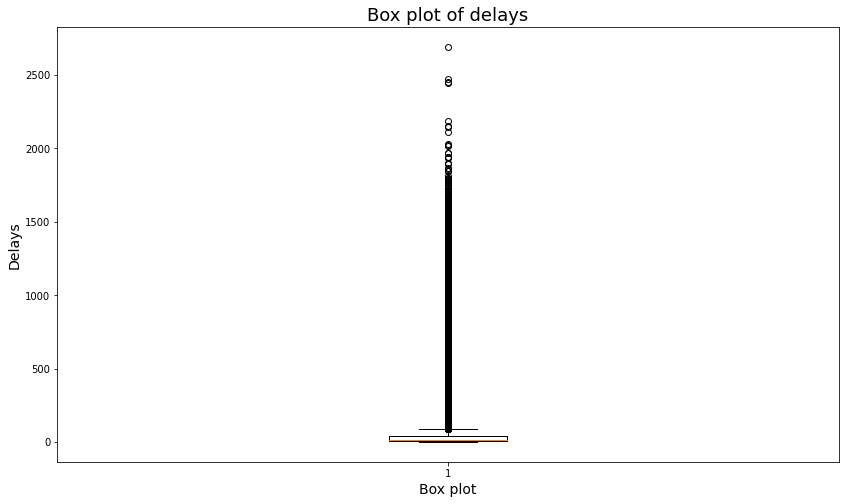

In [69]:
plt.figure(figsize=(14, 8))
plt.boxplot(delayed['ARR_DELAY'])
plt.ylabel("Delays",fontsize=14)
plt.xlabel("Box plot",fontsize=14)
plt.title("Box plot of delays",fontsize=18)
plt.show()

In [73]:
delayed['ARR_DELAY'].max()

2692.0

In [74]:
delayed['ARR_DELAY'].min()

1.0

In [75]:
delayed['ARR_DELAY'].mode()

0    1.0
Name: ARR_DELAY, dtype: float64

In [7]:
print(skew(delayed['ARR_DELAY'], bias=False))

6.606914535477173


In [8]:
print(kurtosis(delayed['ARR_DELAY'], bias=False))

85.25799602961426


Text(16.299999999999997, 0.5, 'Frequency')

<Figure size 1440x1008 with 0 Axes>

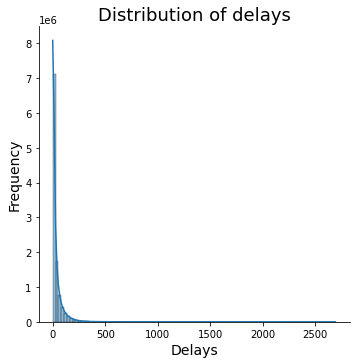

In [65]:
plt.figure(figsize =(20, 14))
sns.displot(delayed['ARR_DELAY'],kde=True,bins=100)
plt.title('Distribution of delays', fontsize=18)
plt.xlabel('Delays', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

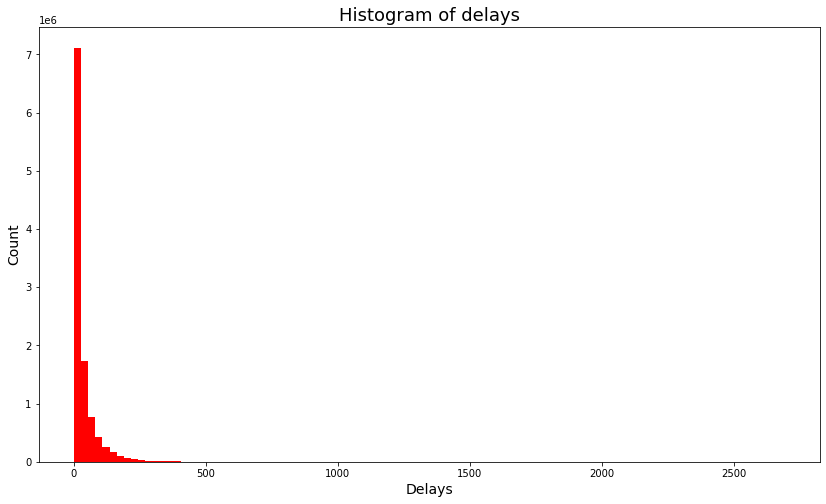

In [53]:
plt.figure(figsize=(14, 8))
plt.hist(delayed['ARR_DELAY'],100,color = "red")
plt.xlabel("Delays",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title("Histogram of delays",fontsize=18)
plt.show()

In [18]:
pd.to_datetime(delayed.FL_DATE)

0          2014-01-01
3          2014-01-01
4          2014-01-01
5          2014-01-01
6          2014-01-01
              ...    
30144604   2018-12-31
30144608   2018-12-31
30144611   2018-12-31
30144612   2018-12-31
30144613   2018-12-31
Name: FL_DATE, Length: 10818009, dtype: datetime64[ns]

In [19]:
delayed['year'] = pd.to_datetime(delayed['FL_DATE']).dt.year

In [20]:
year = delayed.groupby('year')

In [21]:
year['ARR_DELAY'].mean()

year
2014    32.533315
2015    33.112990
2016    34.811314
2017    36.827919
2018    37.730903
Name: ARR_DELAY, dtype: float64

In [22]:
year['ARR_DELAY'].median()

year
2014    16.0
2015    15.0
2016    15.0
2017    16.0
2018    17.0
Name: ARR_DELAY, dtype: float64

In [23]:
delayed['quarter'] = pd.to_datetime(delayed['FL_DATE']).dt.quarter

In [24]:
q = delayed.groupby('quarter')

In [25]:
q['ARR_DELAY'].mean()

quarter
1    34.567073
2    36.121014
3    36.764263
4    32.342876
Name: ARR_DELAY, dtype: float64

In [26]:
q['ARR_DELAY'].median()

quarter
1    16.0
2    16.0
3    16.0
4    14.0
Name: ARR_DELAY, dtype: float64

In [27]:
delayed['month'] = pd.to_datetime(delayed['FL_DATE']).dt.month

In [28]:
m = delayed.groupby('month')

In [29]:
m['ARR_DELAY'].mean()

month
1     36.913761
2     35.249568
3     31.777449
4     33.532315
5     35.254657
6     39.013072
7     39.422309
8     38.102170
9     31.220680
10    30.044539
11    30.990321
12    35.481216
Name: ARR_DELAY, dtype: float64

In [30]:
m['ARR_DELAY'].median()

month
1     17.0
2     16.0
3     14.0
4     15.0
5     16.0
6     18.0
7     18.0
8     17.0
9     13.0
10    13.0
11    14.0
12    16.0
Name: ARR_DELAY, dtype: float64

In [31]:
delayed['week'] = pd.to_datetime(delayed['FL_DATE']).dt.isocalendar().week

In [32]:
week = delayed.groupby('week')

In [33]:
week['ARR_DELAY'].mean()

week
1     43.859830
2     38.835682
3     34.232887
4     29.051040
5     33.507721
6     37.501299
7     33.506829
8     36.299539
9     34.266430
10    33.076359
11    29.509792
12    30.544093
13    32.988161
14    38.115220
15    31.013350
16    31.852789
17    31.666932
18    33.115073
19    32.092136
20    36.627021
21    35.424387
22    39.570790
23    34.987621
24    39.657571
25    41.404876
26    39.888646
27    37.078610
28    38.503232
29    42.601867
30    39.990028
31    39.122892
32    40.584091
33    40.330116
34    34.153956
35    31.673168
36    34.694416
37    29.349937
38    31.427931
39    29.214403
40    29.775473
41    33.008870
42    28.630224
43    29.373448
44    28.514655
45    28.380560
46    31.876110
47    32.248591
48    32.791189
49    31.051261
50    36.334160
51    33.833942
52    38.286567
53    42.306061
Name: ARR_DELAY, dtype: float64

In [34]:
week['ARR_DELAY'].median()

week
1     22.0
2     19.0
3     15.0
4     13.0
5     15.0
6     17.0
7     15.0
8     17.0
9     16.0
10    15.0
11    14.0
12    14.0
13    15.0
14    16.0
15    14.0
16    14.0
17    14.0
18    15.0
19    14.0
20    17.0
21    16.0
22    17.0
23    16.0
24    19.0
25    19.0
26    18.0
27    17.0
28    18.0
29    20.0
30    19.0
31    18.0
32    18.0
33    19.0
34    16.0
35    14.0
36    14.0
37    13.0
38    14.0
39    13.0
40    14.0
41    15.0
42    13.0
43    12.0
44    12.0
45    13.0
46    14.0
47    14.0
48    14.0
49    14.0
50    16.0
51    16.0
52    19.0
53    20.0
Name: ARR_DELAY, dtype: float64

In [35]:
delayed['day'] = pd.to_datetime(delayed['FL_DATE']).dt.day_name()

In [36]:
d = delayed.groupby('day')

In [37]:
d['ARR_DELAY'].mean()

day
Friday       35.421995
Monday       36.820152
Saturday     33.732775
Sunday       35.141819
Thursday     35.092346
Tuesday      34.802574
Wednesday    33.667016
Name: ARR_DELAY, dtype: float64

In [38]:
d['ARR_DELAY'].median()

day
Friday       16.0
Monday       16.0
Saturday     15.0
Sunday       16.0
Thursday     16.0
Tuesday      15.0
Wednesday    15.0
Name: ARR_DELAY, dtype: float64

In [39]:
carrier = delayed.groupby('OP_CARRIER')

In [40]:
carrier['ARR_DELAY'].mean()

OP_CARRIER
9E    49.168585
AA    34.914349
AS    23.765133
B6    42.831371
DL    34.703174
EV    42.412237
F9    42.942410
FL    27.582114
G4    44.930737
HA    15.783381
MQ    35.997076
NK    42.005006
OH    37.544017
OO    38.474860
UA    40.079881
US    26.485547
VX    34.365621
WN    28.680188
YV    41.810773
YX    38.987170
Name: ARR_DELAY, dtype: float64

In [41]:
carrier['ARR_DELAY'].median()

OP_CARRIER
9E    22.0
AA    16.0
AS    11.0
B6    22.0
DL    14.0
EV    19.0
F9    20.0
FL    14.0
G4    19.0
HA     7.0
MQ    18.0
NK    20.0
OH    16.0
OO    15.0
UA    18.0
US    13.0
VX    16.0
WN    15.0
YV    17.0
YX    18.0
Name: ARR_DELAY, dtype: float64

In [42]:
origin = delayed.groupby('ORIGIN')

In [43]:
origin['ARR_DELAY'].mean()

ORIGIN
ABE    43.745103
ABI    38.197782
ABQ    30.997935
ABR    37.383290
ABY    45.464407
         ...    
WYS    21.236239
XNA    45.758030
YAK    29.803178
YNG    75.000000
YUM    26.423834
Name: ARR_DELAY, Length: 369, dtype: float64

In [44]:
origin['ARR_DELAY'].median()

ORIGIN
ABE    14.0
ABI    15.0
ABQ    14.0
ABR    11.0
ABY    17.0
       ... 
WYS     7.5
XNA    18.0
YAK    13.0
YNG    75.0
YUM     8.0
Name: ARR_DELAY, Length: 369, dtype: float64

In [45]:
destination = delayed.groupby('DEST')

In [46]:
destination['ARR_DELAY'].mean()

DEST
ABE    36.623104
ABI    30.427040
ABQ    29.208071
ABR    37.555041
ABY    41.089851
         ...    
WYS    11.785953
XNA    36.012730
YAK    24.230622
YNG    59.500000
YUM    22.858075
Name: ARR_DELAY, Length: 367, dtype: float64

In [47]:
destination['ARR_DELAY'].median()

DEST
ABE    17.0
ABI    15.0
ABQ    15.0
ABR    12.0
ABY    20.0
       ... 
WYS     7.0
XNA    17.0
YAK    12.0
YNG    59.5
YUM     9.0
Name: ARR_DELAY, Length: 367, dtype: float64

In [7]:
dist = distfit()

In [8]:
dist.fit_transform(delayed['ARR_DELAY'])

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.17 sec] [RSS: 8.14308e-05] [loc=35.023 scale=59.141]
[distfit] >[expon     ] [0.04 sec] [RSS: 4.06624e-06] [loc=1.000 scale=34.023]
[distfit] >[pareto    ] [383. sec] [RSS: 0.000106507] [loc=-1.509 scale=2.509]
[distfit] >[dweibull  ] [750. sec] [RSS: 9.09422e-05] [loc=8.000 scale=18.465]
[distfit] >[t         ] [215. sec] [RSS: 3.35927e-05] [loc=12.139 scale=10.839]
[distfit] >[genextreme] [786. sec] [RSS: 4.01437e-05] [loc=9.325 scale=10.940]
[distfit] >[gamma     ] [280. sec] [RSS: 0.000235915] [loc=1.000 scale=1.582]
[distfit] >[lognorm   ] [198. sec] [RSS: 3.81541e-05] [loc=0.440 scale=14.092]
[distfit] >[beta      ] [568. sec] [RSS: 1.96127e-05] [loc=1.000 scale=13050.819]
[distfit] >[uniform   ] [0.04 sec] [RSS: 0.000229011] [loc=1.000 scale=2691.000]
[distfit] >[loggamma  ] [256. sec] [RSS: 9.56081e-05] [loc=-29641.607 scale=3706.893]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.expon_gen at 0x23fc2f317f0>,
  'stats': 'RSS',
  'params': (1.0, 34.02284070941335),
  'name': 'expon',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x23fb3f25340>,
  'score': 4.066236268622947e-06,
  'loc': 1.0,
  'scale': 34.02284070941335,
  'arg': (),
  'CII_min_alpha': 2.7451435844086776,
  'CII_max_alpha': 102.9233219511761},
 'summary':          distr     score  LLE           loc         scale  \
 0        expon  0.000004  NaN           1.0     34.022841   
 1         beta   0.00002  NaN           1.0  13050.818757   
 2            t  0.000034  NaN     12.139009     10.839287   
 3      lognorm  0.000038  NaN      0.440323     14.091716   
 4   genextreme   0.00004  NaN      9.325384     10.940288   
 5         norm  0.000081  NaN     35.022841     59.141171   
 6     dweibull  0.000091  NaN           8.0     18.464972   
 7     loggamma  0.000096  NaN -29641.606801   3706.893431   
 8       pareto  0.000107  NaN 

In [9]:
print(dist.summary)

         distr     score  LLE           loc         scale  \
0        expon  0.000004  NaN           1.0     34.022841   
1         beta   0.00002  NaN           1.0  13050.818757   
2            t  0.000034  NaN     12.139009     10.839287   
3      lognorm  0.000038  NaN      0.440323     14.091716   
4   genextreme   0.00004  NaN      9.325384     10.940288   
5         norm  0.000081  NaN     35.022841     59.141171   
6     dweibull  0.000091  NaN           8.0     18.464972   
7     loggamma  0.000096  NaN -29641.606801   3706.893431   
8       pareto  0.000107  NaN     -1.509304      2.509304   
9      uniform  0.000229  NaN           1.0        2691.0   
10       gamma  0.000236  NaN           1.0       1.58187   

                                        arg  
0                                        ()  
1   (0.7045000019895142, 435.3193460076307)  
2                     (1.0660733627662644,)  
3                      (1.443619379168957,)  
4                    (-0.931952690037

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nexpon\nRSS(loc=1, scale=34.0228)'}, xlabel='Values', ylabel='Frequency'>)

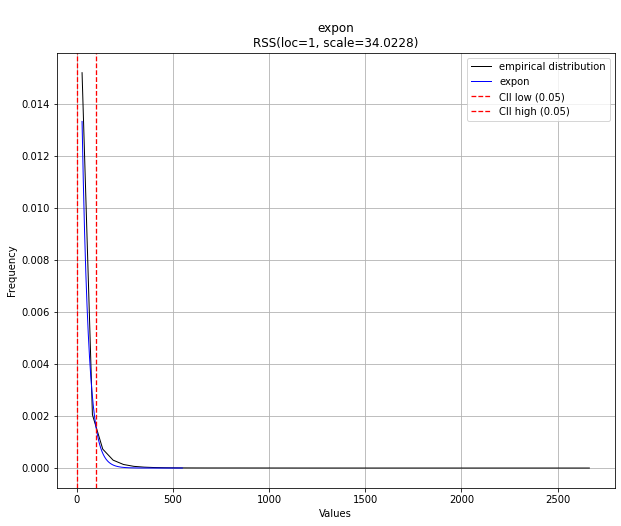

In [10]:
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: expon'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

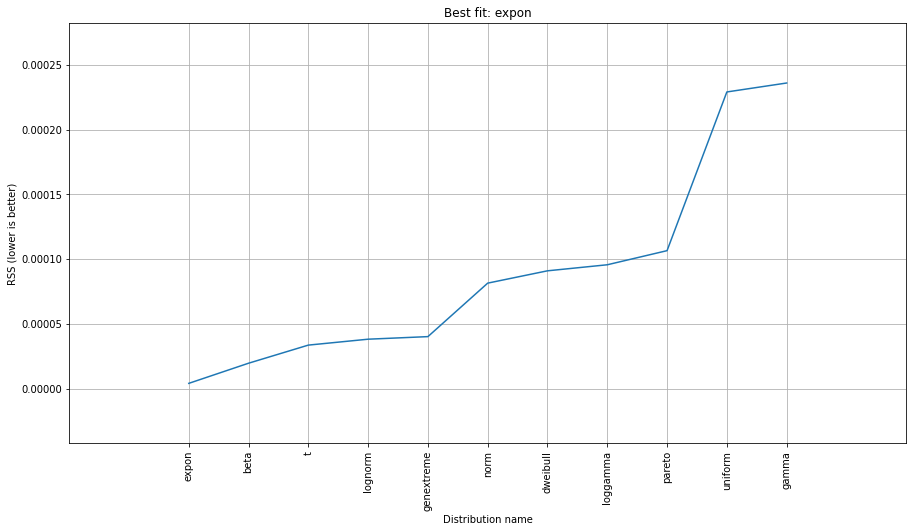

In [12]:
dist.plot_summary()

In [7]:
delayed.corr()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
OP_CARRIER_FL_NUM,1.000000,-0.020121,-0.001920,0.022495,0.058948,0.005781,0.000665,-0.033137,-0.022084,0.005629,...,-0.303808,-0.293560,-0.310557,-0.322042,0.020565,0.007311,-0.020399,-0.004781,0.039487,NaN
CRS_DEP_TIME,-0.020121,1.000000,0.901576,0.099729,-0.068669,0.863193,0.462515,-0.069166,0.663008,0.420231,...,-0.040652,-0.065685,-0.049280,-0.034858,-0.070912,-0.004411,-0.069093,-0.003669,0.146787,NaN
DEP_TIME,-0.001920,0.901576,1.000000,0.155715,-0.068778,0.958356,0.519999,-0.068939,0.671583,0.476072,...,-0.055268,-0.082489,-0.066689,-0.055986,-0.039068,-0.010989,-0.041829,-0.003635,0.173795,NaN
DEP_DELAY,0.022495,0.099729,0.155715,1.000000,-0.069590,0.136675,-0.000383,-0.055622,0.080518,-0.008784,...,0.011242,-0.035864,-0.019643,0.000033,0.642506,0.263349,0.144510,0.019072,0.528729,NaN
TAXI_OUT,0.058948,-0.068669,-0.068778,-0.069590,1.000000,-0.032195,-0.018138,-0.023730,-0.033264,-0.018140,...,0.086405,0.207672,0.048733,0.037790,-0.060083,0.047133,0.331720,-0.005767,-0.121476,NaN
WHEELS_OFF,0.005781,0.863193,0.958356,0.136675,-0.032195,1.000000,0.551013,-0.065833,0.678957,0.506791,...,-0.060426,-0.081961,-0.072639,-0.065126,-0.046883,-0.014005,-0.025299,-0.004460,0.146632,NaN
WHEELS_ON,0.000665,0.462515,0.519999,-0.000383,-0.018138,0.551013,1.000000,-0.004849,0.745108,0.946618,...,-0.006685,-0.013629,-0.010552,-0.013967,-0.067216,-0.024665,0.005552,-0.005671,-0.011480,NaN
TAXI_IN,-0.033137,-0.069166,-0.068939,-0.055622,-0.023730,-0.065833,-0.004849,1.000000,-0.023048,-0.001014,...,0.108363,0.179177,0.086096,0.082219,-0.042914,-0.001373,0.218475,-0.003989,-0.057107,NaN
CRS_ARR_TIME,-0.022084,0.663008,0.671583,0.080518,-0.033264,0.678957,0.745108,-0.023048,1.000000,0.703023,...,0.014117,-0.002248,0.005672,0.009205,-0.062787,-0.002010,-0.017032,-0.003366,0.106496,NaN
ARR_TIME,0.005629,0.420231,0.476072,-0.008784,-0.018140,0.506791,0.946618,-0.001014,0.703023,1.000000,...,-0.011829,-0.017848,-0.015318,-0.019970,-0.066837,-0.024867,0.003514,-0.005607,-0.018929,NaN


In [6]:
lm = LinearRegression()

In [7]:
new = delayed.dropna(subset='DEP_DELAY',axis=0)
new

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2014-01-01,AA,2377,ICT,DFW,1135,1144.0,9.0,12.0,1156.0,...,85.0,78.0,57.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,EV,2502,CRW,DFW,1655,1805.0,70.0,6.0,1811.0,...,185.0,180.0,150.0,946.0,0.0,0.0,0.0,0.0,65.0,NaN
4,2014-01-01,EV,2502,DFW,CRW,1320,1440.0,80.0,9.0,1449.0,...,125.0,115.0,101.0,946.0,6.0,0.0,0.0,0.0,64.0,NaN
5,2014-01-01,EV,2503,AMA,DFW,1925,1909.0,-16.0,8.0,1917.0,...,65.0,104.0,43.0,312.0,0.0,0.0,23.0,0.0,0.0,NaN
6,2014-01-01,EV,2503,DFW,AMA,1740,1740.0,0.0,14.0,1754.0,...,70.0,73.0,54.0,312.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30144604,2018-12-31,AA,1811,CLT,TPA,1644,1639.0,-5.0,40.0,1719.0,...,106.0,120.0,77.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN
30144608,2018-12-31,AA,1814,DFW,PHL,1955,2026.0,31.0,12.0,2038.0,...,182.0,160.0,142.0,1303.0,NaN,NaN,NaN,NaN,NaN,NaN
30144611,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN
30144612,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
x=new[['DEP_DELAY']]
y=new['ARR_DELAY']

In [9]:
lm.fit(x,y)

LinearRegression()

In [12]:
print(lm.intercept_)

[5.04326329]


In [13]:
print(lm.coef_)

[[0.94051523]]


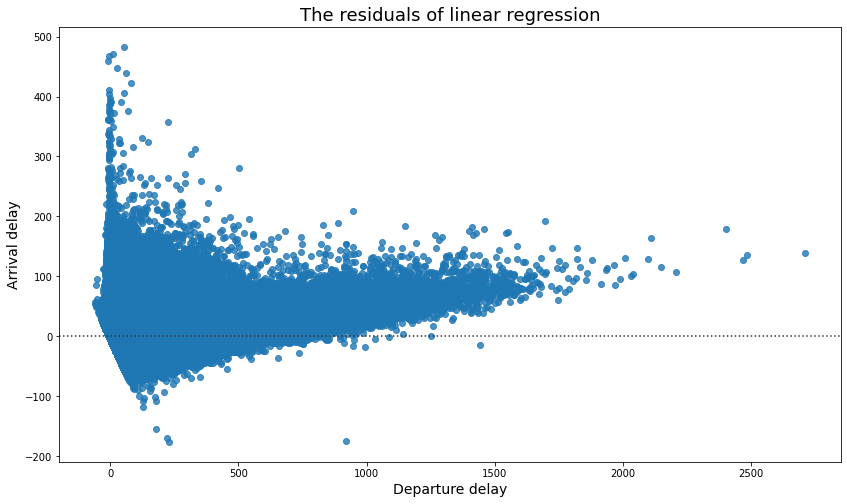

In [55]:
plt.figure(figsize=(14, 8))
sns.residplot(x,y)
plt.xlabel("Departure delay",fontsize=14)
plt.ylabel("Arrival delay",fontsize=14)
plt.title("The residuals of linear regression",fontsize=18)
plt.show()

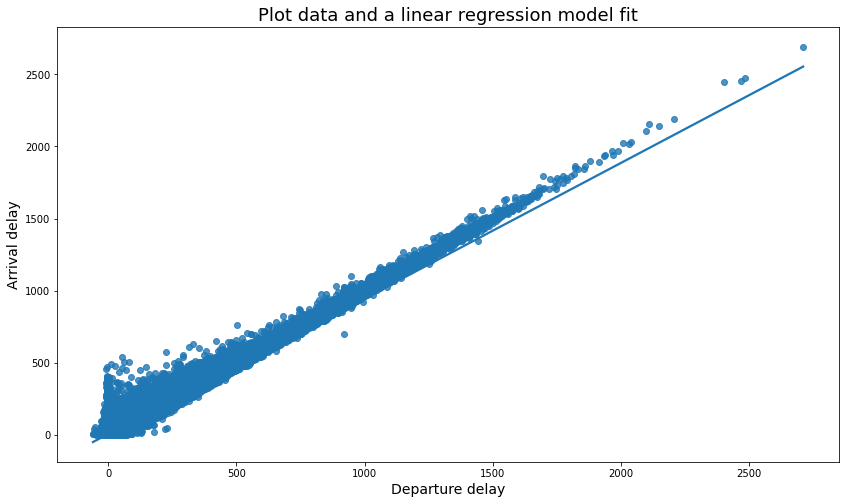

In [52]:
plt.figure(figsize=(14, 8))
sns.regplot(x,y, data=new)
plt.xlabel("Departure delay",fontsize=14)
plt.ylabel("Arrival delay",fontsize=14)
plt.title("Plot data and a linear regression model fit",fontsize=18)
plt.show()

In [16]:
Yhat = lm.predict(x)
Yhat

array([[13.50790035],
       [70.87932937],
       [80.28448166],
       ...,
       [10.68635467],
       [ 0.34068714],
       [26.67511357]])

In [14]:
lm.score(x, y)

0.9340010905936487

In [15]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y,Yhat)

230.8632153082759